In [1]:
# Read in the fasta file Safe_harbors.fasta
from Bio import SeqIO

# Open the fasta file
with open("Safe_harbors.fasta", "r") as handle:
    # Parse the fasta file and get the sequence records
    records = SeqIO.parse(handle, "fasta")
    
    # Iterate through each sequence record
    for record in records:
        # Print the sequence ID and length
        print("ID:", record.id)
        print("Length:", len(record.seq))

ID: NW_003613580.1:0-337940
Length: 337940
ID: NW_003613580.1:438591-586660
Length: 148069
ID: NW_003613580.1:899042-1784793
Length: 885751
ID: NW_003613580.1:2610115-2802800
Length: 192685
ID: NW_003613580.1:2933709-2983220
Length: 49511
ID: NW_003613580.1:4891786-4896664
Length: 4878
ID: NW_003613580.1:5000679-5386370
Length: 385691
ID: NW_003613580.1:6042750-6072255
Length: 29505
ID: NW_003613580.1:6448285-6582540
Length: 134255
ID: NW_003613580.1:6697639-6863992
Length: 166353
ID: NW_003613580.1:6966200-7132394
Length: 166194
ID: NW_003613580.1:7499638-7785745
Length: 286107
ID: NW_003613580.1:8558235-8779783
Length: 221548
ID: NW_003613581.1:361760-414838
Length: 53078
ID: NW_003613581.1:1988843-2046289
Length: 57446
ID: NW_003613581.1:2358686-2597009
Length: 238323
ID: NW_003613581.1:3790058-3955997
Length: 165939
ID: NW_003613581.1:4081699-4193452
Length: 111753
ID: NW_003613581.1:4294158-4461880
Length: 167722
ID: NW_003613581.1:5287940-5860141
Length: 572201
ID: NW_003613581.1

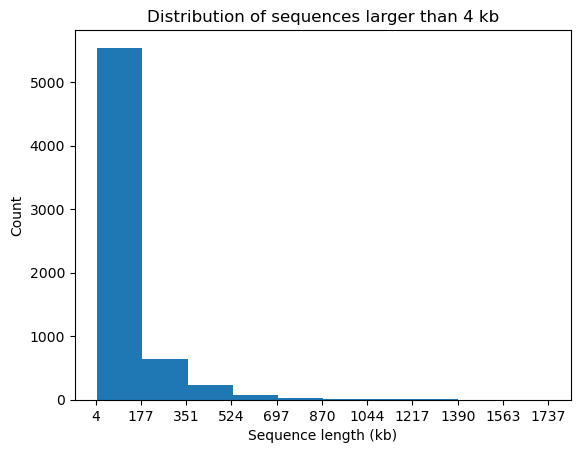

Number of sequences:  107740
Average sequence length:  6700.147094857992
Longest sequence:  1736565
Shortest sequence:  24
Number of sequences larger than 4 kb:  8730
Distribution of sequence lengths (in bins of 400 bp):  [7694  669  236   73   30   14    7    4    1    2]
Number of lines in the bed file:  107740


In [7]:
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt

# Open the fasta file
fasta_file = "Safe_harbors.fasta"
with open(fasta_file, "r") as handle:
    # Parse the fasta file and get the sequence records
    records = SeqIO.parse(handle, "fasta")
    
    # Create an empty list to store sequence lengths
    seq_lengths = []
    
    # Iterate through each sequence record
    for record in records:
        # Add the length of the sequence to the list
        seq_lengths.append(len(record.seq))
    
    # Calculate the number of sequences in the file
    num_sequences = len(seq_lengths)
    
    # Calculate the average length of the sequences in the file
    avg_length = np.mean(seq_lengths)
    
    # Find the longest and shortest sequences in the file
    longest_seq = max(seq_lengths)
    shortest_seq = min(seq_lengths)
    
    # Calculate the distribution of sequence lengths
    seq_lengths = np.array(seq_lengths)
    num_large_seqs = len(seq_lengths[seq_lengths > 4000])
    seq_length_counts, bin_edges = np.histogram(seq_lengths[seq_lengths > 4000], bins=10)
    
# Open the bed file
bed_file = "Safe_harbors_with_alt.bed"
with open(bed_file, "r") as handle:
    # Count the number of lines in the bed file
    num_lines = sum(1 for line in handle)
    
# Convert sequence lengths from bp to kb
seq_lengths_kb = seq_lengths / 1000

# Calculate the bin edges in kb
bin_edges_kb = bin_edges / 1000

# Plot the distribution of sequence lengths
plt.hist(seq_lengths_kb[seq_lengths_kb > 10], bins=10)
plt.title("Distribution of sequences larger than 4 kb")
plt.xlabel("Sequence length (kb)")
plt.ylabel("Count")
plt.xticks(bin_edges_kb)
plt.show()

# Print the results
print("Number of sequences: ", num_sequences)
print("Average sequence length: ", avg_length)
print("Longest sequence: ", longest_seq)
print("Shortest sequence: ", shortest_seq)
print("Number of sequences larger than 4 kb: ", num_large_seqs)
print("Distribution of sequence lengths (in bins of 400 bp): ", seq_length_counts)
print("Number of lines in the bed file: ", num_lines)